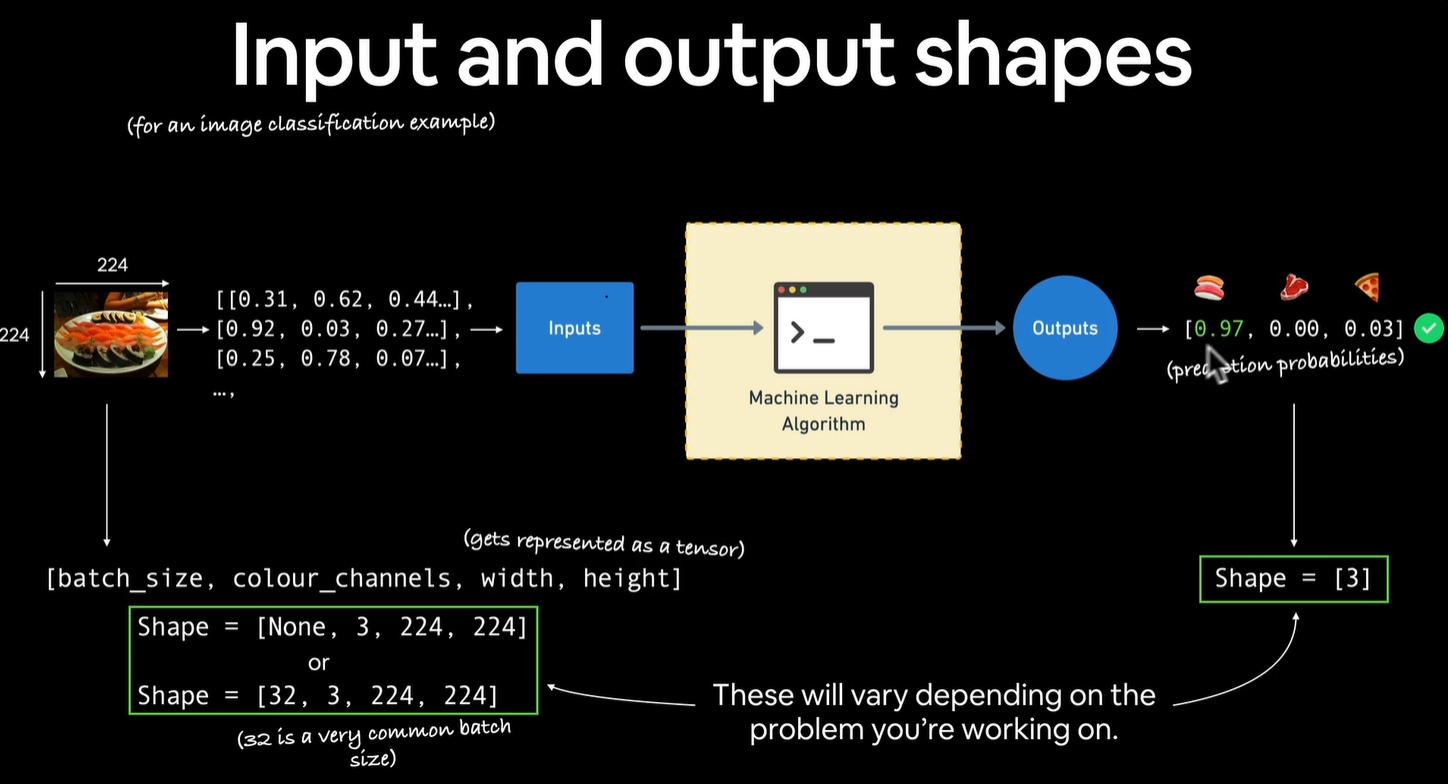

Here the input and output shape are being discussed. The input shape is a tensor with 4 dimensions batch_size, color_channels, width and height). These 4 can change based on the input type. For image based data this is basic. the batch size can be either none or 32. 

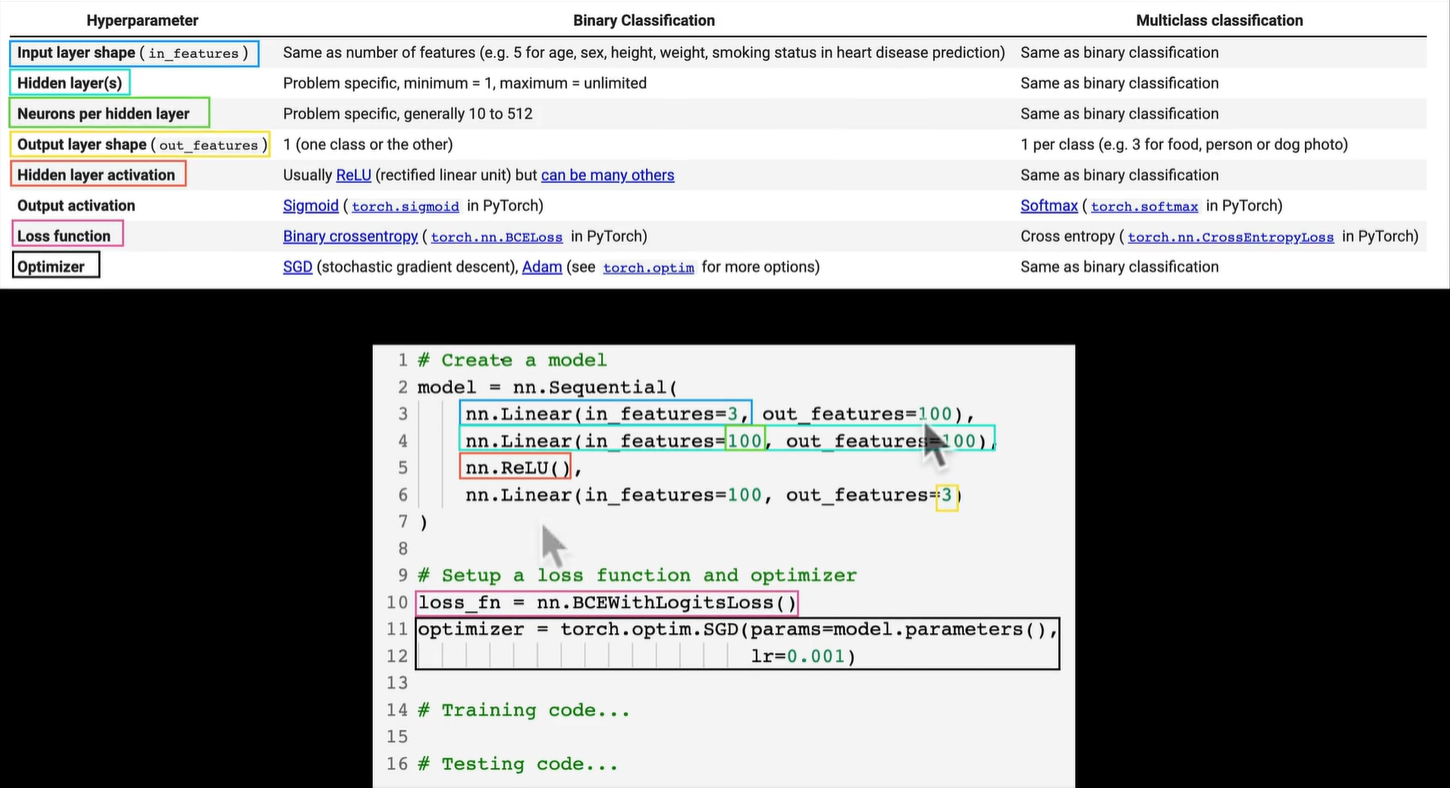

Basic architecture for the classification model.. 
* nn.Linear(in_features = 3) denotes the input numbers
* second nn.Linear denotes the second layer where the in_features(input =100)[[ which is from previous out_features =100]] and out_features(output =100) 
* third we have nn.ReLU() layer
* 4th layer is in_features = 100 output from second nn.Linear and the out_feature here denotes the output classes that we need.  

* Like the regression model, this also we set loss function and optimizer function


### Make classification data and get it ready 

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles #import make circles dataset from sklearn dataset

#make 1000 samples

n_samples = 1000

#create circles
x,y = make_circles(n_samples,
                  noise = 0.03,
                  random_state = 42) #equal to setting random seed

In [3]:
len(x), len(y)

(1000, 1000)

In [4]:
print(f"first 5 samples of X: \n {x[:5]}")
print(f"first 5 samples of Y: \n {y[:5]}")

first 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of Y: 
 [1 1 1 1 0]


#### Looks like there's two X values per one y value

In [5]:
#make dataframe of circles data

import pandas as pd

#splitting the x into x1 and x2 and plotting circles and color coding it by label
circles = pd.DataFrame({"X1": x[:,0], #0th index of x
                       "x2": x[:,1], #1st index of x
                       "label" : y})

In [6]:
circles.head(10)

,X1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], #0th index of x in x axis
           y = x[:,1], #1st index of x in y axis
           c=y, #denotes color 
           cmap = plt.cm.RdYlBu 
           );

##### from the plot we can see that the x1 and x2 are two coordinates of the graphs. so once the dots is places on the particular cordninte, if it belongs to red or blue is based on y

##### Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1) . ie when a dot is given we need to classfiy if its red or blue

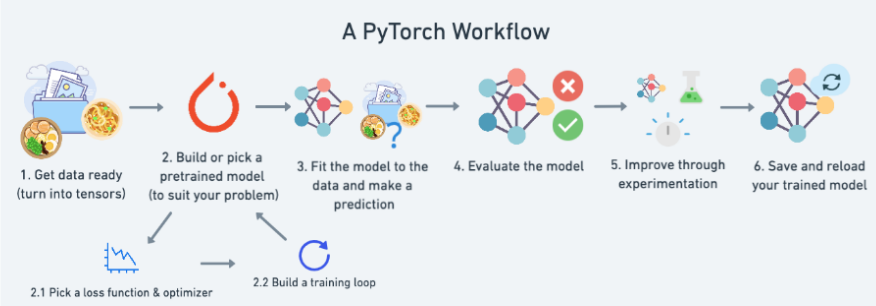

In [8]:
#Now that our data is ready we convert into tesors and start our process

import torch

In [9]:
type(x)

numpy.ndarray

In [10]:
#convert numpy array to torch

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(x), type(y), print(x[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])


(torch.Tensor, torch.Tensor, None)

In [11]:
#now we split the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=42)

In [12]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

###### 2. Building a model
We've got some data ready, now it's time to build a model.

We'll break it down into a few parts.

* Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
* Constructing a model by subclassing nn.Module.
* Defining a loss function and optimizer.
* Creating a training loop (this'll be in the next section).
we've been through all of the above steps before in notebook 02.

Except now we'll be adjusting them so they work with a classification dataset.

Let's start by importing PyTorch and torch.nn as well as setting up device agnostic code.

In [13]:
#make device agnostic code

device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

Let's create a model class that:

* Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
* Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
* Defines a forward() method containing the forward pass computation of the model.
* Instantiates the model class and sends it to the target device.

In [14]:
x_train[:1].shape

torch.Size([1, 2])

In [15]:
y_train[:1].shape

torch.Size([1])

In [16]:
#model building

import torch.nn as nn

#step 1
class circlesmodel(nn.Module):
    def __init__(self):
        super().__init__()
        
#step 2. create nn.linear capable of handling shapes of our data
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5) #in features = 2 which should be equal to input shappe (x.shape) athe out_features in 1st layer can be any number usualy multiple of 8
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1) #in_features = prev out_features and out_features = output shape (i.e y.shape)
    
    #step 3. define a forward() method that outlies the forward pass / propogation
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) #x ->layer_1 ->layer_2 -> output

model_2 = circlesmodel().to(device)
model_2

circlesmodel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
#lets replicate the model above using nn.sequential()

model_2_sequ = nn.Sequential(
                nn.Linear(in_features = 2, out_features = 5),
                nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_2_sequ

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_2.state_dict() #denotes current parameter values

OrderedDict([('layer_1.weight', tensor([[-0.4276, -0.5400],
                      [ 0.2615,  0.4518],
                      [-0.0557, -0.2739],
                      [-0.3208,  0.6052],
                      [ 0.0406, -0.5926]])),
             ('layer_1.bias',
              tensor([-0.5662,  0.5578, -0.2754, -0.0475,  0.0648])),
             ('layer_2.weight',
              tensor([[-0.2286,  0.0114,  0.3734, -0.4181, -0.3711]])),
             ('layer_2.bias', tensor([0.2690]))])

In [19]:
#Make predictions:

untrained_preds = model_2(x_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, shape:{untrained_preds.shape}")
print(f"Length of test samples : {len(y_test)}, shape:{y_test.shape}")
print(f"First 10 predictions : {untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")
      

Length of predictions : 200, shape:torch.Size([200, 1])
Length of test samples : 200, shape:torch.Size([200])
First 10 predictions : tensor([[0.2185],
        [0.2943],
        [0.1601],
        [0.2344],
        [0.3829],
        [0.4275],
        [0.4644],
        [0.4962],
        [0.1508],
        [0.3019]], grad_fn=<SliceBackward>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


##### Setting up Loss Function and Optimizer

#### For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.
#### For classification we use binary cross entrophy or classification entrophy as loss function


##### For example, the stochastic gradient descent optimizer (SGD, torch.optim.SGD()) can be used for a range of problems, so can too the Adam optimizer (torch.optim.Adam()).

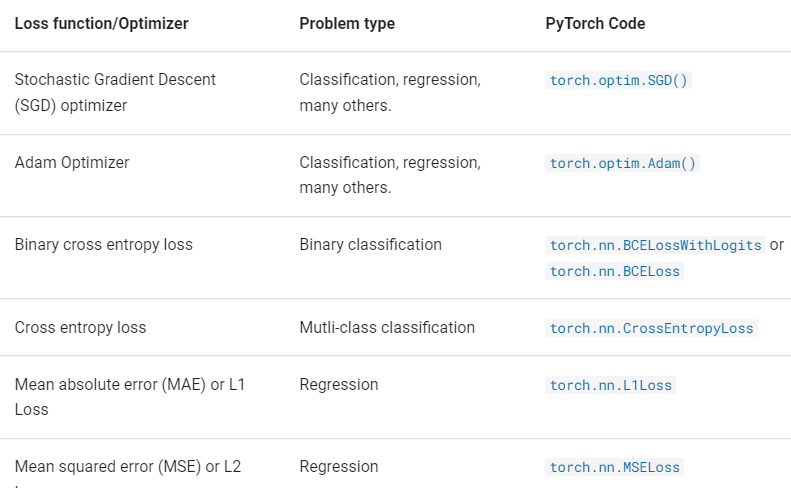

From the above table we can see that we can use binary cross entrophy for classification problem. in binary classification pytorch has two implementations

* torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features)
* torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon)
 
 ##### *The documentation for torch.nn.BCEWithLogitsLoss() states that it's more numerically stable than using torch.nn.BCELoss() after a nn.Sigmoid layer*


In [20]:
#creating loss function

loss_fn= nn.BCEWithLogitsLoss() #sigmoid build-in

#setting an optimizer

optimizer = torch.optim.SGD(params = model_2. parameters(), lr =0.1)

#calculating accuracy

#Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions


def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() #torch.eq calculates the common tensors between test and pred
    acc = (correct / len(y_pred)) *100
    return acc

### 3. Training a model

PyTorch training loop steps
* **Forward pass**- The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
* **Calculate the loss** - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
* **Zero gradients** - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
* **Perform backpropagation on the loss** - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
* **Step the optimizer (gradient descent)** - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

 * 1) Our model outputs are going to be **logits**
 * 2) We can convert logits into predictoon probabilities by passing them to somekind of activation function (eg.sigmoid for binary classification and softmax for muticlass classification)
 * 3) convert model predictions into prediction labels by either rounding them or taking the argmax()
 
 
 ###### logits --> prediction probabilities --> prediction labels

In [21]:
model_2.eval()
with torch.no_grad():
    y_logits = model_2(x_test).squeeze()
y_logits, y_logits.shape

(tensor([0.2185, 0.2943, 0.1601, 0.2344, 0.3829, 0.4275, 0.4644, 0.4962, 0.1508,
         0.3019, 0.1988, 0.2497, 0.4884, 0.1854, 0.1181, 0.4513, 0.3696, 0.1569,
         0.1792, 0.1289, 0.2935, 0.5001, 0.1619, 0.1256, 0.4194, 0.4732, 0.2577,
         0.4724, 0.1020, 0.2194, 0.4174, 0.4089, 0.2115, 0.3185, 0.1925, 0.3168,
         0.2398, 0.1753, 0.2847, 0.1998, 0.1530, 0.1399, 0.3718, 0.3869, 0.2106,
         0.3303, 0.4146, 0.2883, 0.3024, 0.4092, 0.2289, 0.2132, 0.4790, 0.3609,
         0.4431, 0.2413, 0.4547, 0.1736, 0.1355, 0.0995, 0.4034, 0.4804, 0.1086,
         0.2025, 0.2311, 0.2872, 0.4556, 0.4944, 0.3317, 0.4843, 0.4401, 0.3495,
         0.0978, 0.1461, 0.4630, 0.4315, 0.2861, 0.4417, 0.1768, 0.3990, 0.1250,
         0.2268, 0.4816, 0.2831, 0.1372, 0.3645, 0.4364, 0.1893, 0.3304, 0.5015,
         0.1479, 0.3040, 0.2808, 0.3636, 0.1783, 0.1568, 0.3201, 0.1312, 0.1142,
         0.3328, 0.2999, 0.1030, 0.3519, 0.4534, 0.1114, 0.3092, 0.2748, 0.4464,
         0.1704, 0.4437, 0.2

In [22]:
y_test[:5], y_test[:5].shape

(tensor([1., 0., 1., 0., 1.]), torch.Size([5]))

##### we can see that the y_logits and y_test are not in same format but we made shape same through squeeze

In [23]:
#use sigmoid function for output activation to turn preidctions into output probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([0.5544, 0.5731, 0.5399, 0.5583, 0.5946, 0.6053, 0.6141, 0.6216, 0.5376,
        0.5749, 0.5495, 0.5621, 0.6197, 0.5462, 0.5295, 0.6109, 0.5914, 0.5391,
        0.5447, 0.5322, 0.5729, 0.6225, 0.5404, 0.5314, 0.6033, 0.6162, 0.5641,
        0.6159, 0.5255, 0.5546, 0.6029, 0.6008, 0.5527, 0.5790, 0.5480, 0.5785,
        0.5597, 0.5437, 0.5707, 0.5498, 0.5382, 0.5349, 0.5919, 0.5955, 0.5525,
        0.5818, 0.6022, 0.5716, 0.5750, 0.6009, 0.5570, 0.5531, 0.6175, 0.5893,
        0.6090, 0.5600, 0.6118, 0.5433, 0.5338, 0.5249, 0.5995, 0.6178, 0.5271,
        0.5505, 0.5575, 0.5713, 0.6120, 0.6211, 0.5822, 0.6188, 0.6083, 0.5865,
        0.5244, 0.5365, 0.6137, 0.6062, 0.5710, 0.6087, 0.5441, 0.5985, 0.5312,
        0.5565, 0.6181, 0.5703, 0.5343, 0.5901, 0.6074, 0.5472, 0.5819, 0.6228,
        0.5369, 0.5754, 0.5697, 0.5899, 0.5445, 0.5391, 0.5793, 0.5327, 0.5285,
        0.5824, 0.5744, 0.5257, 0.5871, 0.6115, 0.5278, 0.5767, 0.5683, 0.6098,
        0.5425, 0.6092, 0.5728, 0.5464, 

#### Now we can see that its in same shape. but not binary

In [24]:
#to convert to binary labels , we do rounding

torch.round(y_pred_probs)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])

In [25]:
#summing up all the above code in single line

y_pred_labels = torch.round(torch.sigmoid(model_2(x_test)))
y_pred_labels

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [26]:
y_test.shape

torch.Size([200])

In [27]:
#check if y_test and y_pred_labels are equal
print(torch.eq(y_test, y_pred_labels))

tensor([[ True, False,  True,  ..., False,  True,  True],
        [ True, False,  True,  ..., False,  True,  True],
        [ True, False,  True,  ..., False,  True,  True],
        ...,
        [ True, False,  True,  ..., False,  True,  True],
        [ True, False,  True,  ..., False,  True,  True],
        [ True, False,  True,  ..., False,  True,  True]])


#### As we started with random values, our y_test and y_pred_labels are not same.

#### Building Training and Test Loop:

In [28]:
loss_fn

BCEWithLogitsLoss()

In [29]:
torch.manual_seed(42)

#set number of epochs:
epochs = 100

epoch_count =[]
loss_values =[]
test_loss_values =[]



#training loop

for epoch in range(epochs):
    
    1.#training model
    model_2.train()
    
    2. #forward pass
    
    y_logits = model_2(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    
    3. #calculate loss/accuracy
    
    loss = loss_fn(y_logits, y_train)
    #we are using logits are input because the bcewithlogitloss()
                         #that we are using requires raw logits as input
    acc= accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
    
    4. #Optimizer zero grad
    
    optimizer.zero_grad()
    
    5. #loss backward(backward propogation to reduce loss)
    
    loss.backward()
    
    6. #optimizer step(gradient descent)
    
    optimizer.step()
    
    7.#set testing model
    
    model_2.eval()
    
    with torch.no_grad(): #turns off the gradient tracking
        
        #1.do forward pass
        
        test_logits = model_2(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        
        #2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
        test_accuracy = accuracy_fn(y_true = y_test,
                    y_pred = test_pred)
        
    if epoch%10 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch} | Loss:{loss:.5f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")
        
        #print out model state dict()
        #print(model_2.state_dict())

Epoch:0 | Loss:0.70575 , Acc: 50.00% | Test Loss: 0.81326, Test acc: 50.00%
Epoch:10 | Loss:0.69784 , Acc: 50.75% | Test Loss: 0.80086, Test acc: 52.00%
Epoch:20 | Loss:0.69518 , Acc: 54.37% | Test Loss: 0.77374, Test acc: 52.50%
Epoch:30 | Loss:0.69420 , Acc: 51.62% | Test Loss: 0.75932, Test acc: 52.50%
Epoch:40 | Loss:0.69379 , Acc: 50.50% | Test Loss: 0.76022, Test acc: 51.00%
Epoch:50 | Loss:0.69357 , Acc: 50.62% | Test Loss: 0.75971, Test acc: 50.50%
Epoch:60 | Loss:0.69344 , Acc: 50.62% | Test Loss: 0.75541, Test acc: 51.00%
Epoch:70 | Loss:0.69334 , Acc: 50.38% | Test Loss: 0.76181, Test acc: 49.00%
Epoch:80 | Loss:0.69327 , Acc: 50.25% | Test Loss: 0.76371, Test acc: 48.50%
Epoch:90 | Loss:0.69321 , Acc: 50.75% | Test Loss: 0.75941, Test acc: 49.00%


In [30]:
#make prediction with new trained model
import torch

with torch.no_grad():
    y_pred_new =torch.round(torch.sigmoid(model_2(x_test).squeeze()))
    
    
y_pred_new

tensor([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        0., 1.])

In [31]:
print(torch.eq(y_test, y_pred_new))

tensor([False, False, False, False,  True,  True, False, False, False, False,
         True,  True, False, False,  True,  True,  True,  True, False,  True,
        False, False, False,  True, False, False,  True, False,  True, False,
         True, False,  True, False,  True,  True, False, False, False, False,
        False, False,  True, False,  True,  True, False, False,  True,  True,
         True,  True, False, False,  True,  True,  True, False, False,  True,
         True, False,  True, False, False,  True,  True, False, False, False,
         True, False,  True, False,  True,  True, False, False,  True,  True,
         True, False, False, False, False,  True, False,  True,  True, False,
        False, False, False,  True, False,  True,  True, False,  True, False,
        False,  True,  True,  True,  True,  True, False, False,  True,  True,
         True, False, False,  True,  True,  True, False,  True, False,  True,
        False,  True, False, False,  True,  True, False,  True, 

#### We can see our model is not learning properly. So we are evaluating our model

#### We need to import the helper_functions.py script contains a helpful function called plot_decision_boundary() which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

In [32]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [33]:
import numpy as np

In [34]:
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

In [35]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


from helper_functions import plot_predictions, plot_decision_boundary 

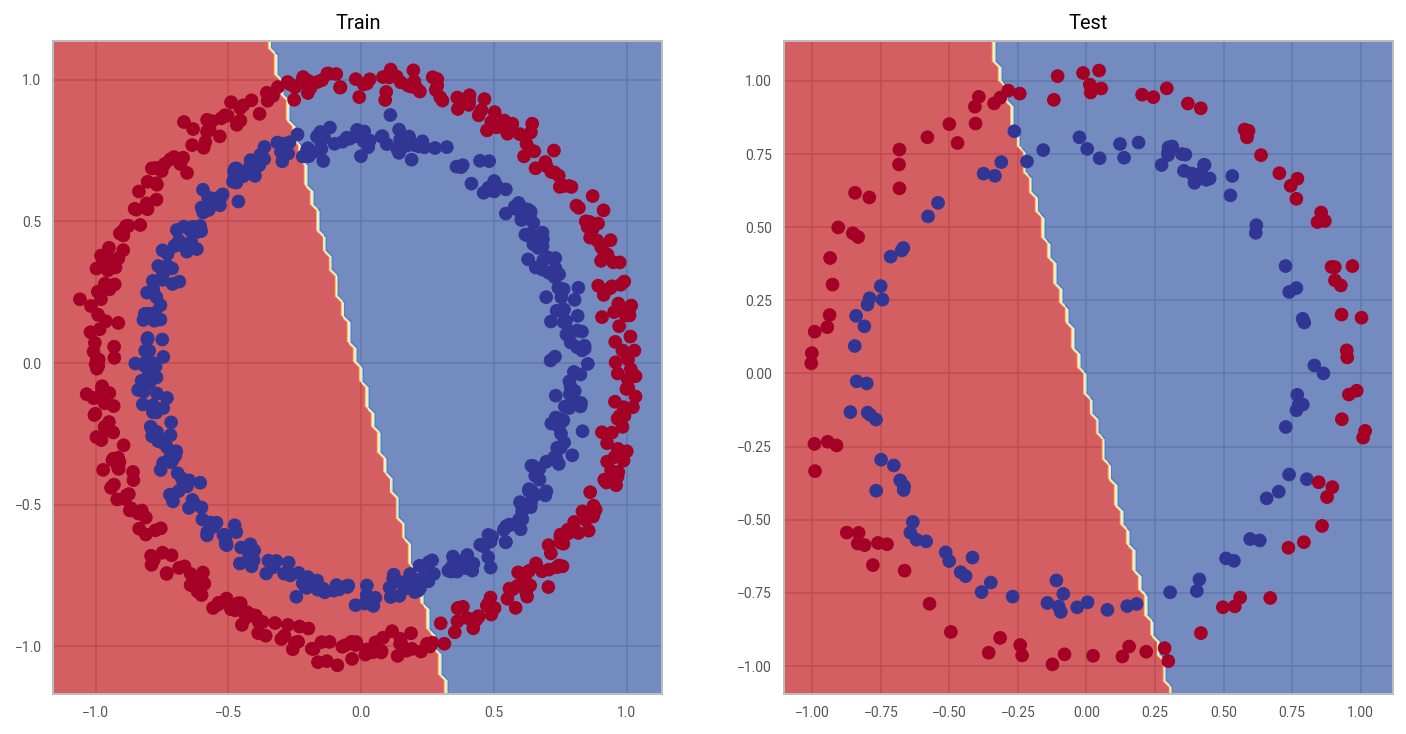

In [36]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, x_test, y_test)

In [37]:
import os
os.getcwd()

'/home/cdsw'

### Improving a model 

* **ADD MORE LAYERS** - give the model more chance to learn about patterns in data
* **ADD MORE HIDEN UNITS (Feautures besides input and output)** - increase the hidden units i.e double
* **ADD MORE EPOCH** - 
* **CHANGE ACTIVATION FUNCTION** - give the model more chance to learn about patterns in data
* **CHANGE LEARNING RATE** - setting up learning rate appropriate not small not large enough to explode
* **ADD ** - give the model more chance to learn about patterns in data
* **CHANGING OPTIMIZER FUNCTION** - we implement SGD , we can try ADAMS



#### *********** Increase the layer , features************

In [38]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_3= CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
model_3.state_dict() #denotes current parameter values

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, 

In [40]:
#creating loss function

loss_fn= nn.BCEWithLogitsLoss() #sigmoid build-in

#setting an optimizer

optimizer = torch.optim.SGD(params = model_3. parameters(), lr =0.1)

#calculating accuracy

#Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions


def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() #torch.eq calculates the common tensors between test and pred
    acc = (correct / len(y_pred)) *100
    return acc

In [41]:
torch.manual_seed(42)

#set number of epochs:
epochs = 1000  # ***Increase Epoch****

epoch_count =[]
loss_values =[]
test_loss_values =[]



#training loop

for epoch in range(epochs):
    
    1.#training model
    model_3.train()
    
    2. #forward pass
    
    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    
    3. #calculate loss/accuracy
    
    loss = loss_fn(y_logits, y_train)
    #we are using logits are input because the bcewithlogitloss()
                         #that we are using requires raw logits as input
    acc= accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
    
    4. #Optimizer zero grad
    
    optimizer.zero_grad()
    
    5. #loss backward(backward propogation to reduce loss)
    
    loss.backward()
    
    6. #optimizer step(gradient descent)
    
    optimizer.step()
    
    7.#set testing model
    
    model_3.eval()
    
    with torch.no_grad(): #turns off the gradient tracking
        
        #1.do forward pass
        
        test_logits = model_3(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        
        #2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
        test_accuracy = accuracy_fn(y_true = y_test,
                    y_pred = test_pred)
        
    if epoch%100 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch} | Loss:{loss:.5f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")
        
        #print out model state dict()
        #print(model_2.state_dict())

Epoch:0 | Loss:0.69396 , Acc: 50.88% | Test Loss: 0.75541, Test acc: 51.00%
Epoch:100 | Loss:0.69305 , Acc: 50.38% | Test Loss: 0.76681, Test acc: 48.00%
Epoch:200 | Loss:0.69299 , Acc: 51.12% | Test Loss: 0.77681, Test acc: 46.00%
Epoch:300 | Loss:0.69298 , Acc: 51.62% | Test Loss: 0.78301, Test acc: 45.00%
Epoch:400 | Loss:0.69298 , Acc: 51.12% | Test Loss: 0.77801, Test acc: 46.00%
Epoch:500 | Loss:0.69298 , Acc: 51.00% | Test Loss: 0.77801, Test acc: 46.00%
Epoch:600 | Loss:0.69298 , Acc: 51.00% | Test Loss: 0.77801, Test acc: 46.00%
Epoch:700 | Loss:0.69298 , Acc: 51.00% | Test Loss: 0.77801, Test acc: 46.00%
Epoch:800 | Loss:0.69298 , Acc: 51.00% | Test Loss: 0.77801, Test acc: 46.00%
Epoch:900 | Loss:0.69298 , Acc: 51.00% | Test Loss: 0.77801, Test acc: 46.00%


Even with all our below steps taken, we havent successfully improved our model
1. ADD MORE LAYERS - give the model more chance to learn about patterns in data
2. ADD MORE HIDEN UNITS (Feautures besides input and output) - increase the hidden units i.e double
3. ADD MORE EPOCH -
4. CHANGE ACTIVATION FUNCTION - give the model more chance to learn about patterns in data
5. CHANGE LEARNING RATE - setting up learning rate appropriate not small not large enough to explode
6. *ADD * - give the model more chance to learn about patterns in data
7. CHANGING OPTIMIZER FUNCTION - we implement SGD , we can try ADAMS

#### Troubleshooting the Model

In [42]:
# create some data 

weight = 0.7
bias = 0.3
start = 0
end = 1
step =0.01

#create data

x_regression = torch.arange(start, end, step). unsqueeze(dim=1)
y_regression = weight * x_regression +bias

print(x_regression[:5],y_regression[:5] )

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280]])


In [43]:
#create train and test split

train_split = int(0.8 * len(x_regression))

x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]

len(x_train_regression),len(y_train_regression),len(x_test_regression),len(y_test_regression)

(80, 80, 20, 20)

In [44]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=None):
    
    plt.figure(figsize=(10, 7))

  # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size": 14})

In [45]:
x_train_regression.shape,y_train_regression.shape,x_test_regression.shape, y_test_regression.shape,x_train_regression[:1],y_train_regression[:1] 

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]),
 tensor([[0.]]),
 tensor([[0.3000]]))

#### We can see that this has 1 input 1 output. But  model_3 has 2 inputs and 1 output. So we cant use the same model for this input . We need to change it. So we need to change the model_3 before applying to this case

In [46]:
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 1, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_4= CircleModelV3().to(device)
model_4

CircleModelV3(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
#creating loss function

loss_fn= nn.L1Loss() #sigmoid build-in

#setting an optimizer

optimizer = torch.optim.SGD(params = model_4. parameters(), lr = 0.01)

In [48]:
torch.manual_seed(42)

#set number of epochs:
epochs = 1000  # ***Increase Epoch****

epoch_count =[]
loss_values =[]
test_loss_values =[]



#training loop

for epoch in range(epochs):
    
    1.#training model
    model_4.train()
    
    2. #forward pass
    
    y_pred = model_4(x_train_regression)
    
    
    3. #calculate loss/accuracy
    
    loss = loss_fn(y_pred, y_train_regression)

    
    4. #Optimizer zero grad
    
    optimizer.zero_grad()
    
    5. #loss backward(backward propogation to reduce loss)
    
    loss.backward()
    
    6. #optimizer step(gradient descent)
    
    optimizer.step()
    
    7.#set testing model
    
    model_4.eval()
    
    with torch.no_grad(): #turns off the gradient tracking
        
        #1.do forward pass
        
        test_pred =  model_4(x_test_regression)
        
        
        #2. calculate the loss
        test_loss = loss_fn(test_pred, y_test_regression)
        
    if epoch%100 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch} | Loss:{loss:.5f} | Test Loss: {test_loss:.5f}")
        
        #print out model state dict()
        #print(model_2.state_dict())

Epoch:0 | Loss:0.75986 | Test Loss: 0.91103
Epoch:100 | Loss:0.02858 | Test Loss: 0.00081
Epoch:200 | Loss:0.02533 | Test Loss: 0.00209
Epoch:300 | Loss:0.02137 | Test Loss: 0.00305
Epoch:400 | Loss:0.01964 | Test Loss: 0.00341
Epoch:500 | Loss:0.01940 | Test Loss: 0.00387
Epoch:600 | Loss:0.01903 | Test Loss: 0.00379
Epoch:700 | Loss:0.01878 | Test Loss: 0.00381
Epoch:800 | Loss:0.01840 | Test Loss: 0.00329
Epoch:900 | Loss:0.01798 | Test Loss: 0.00360


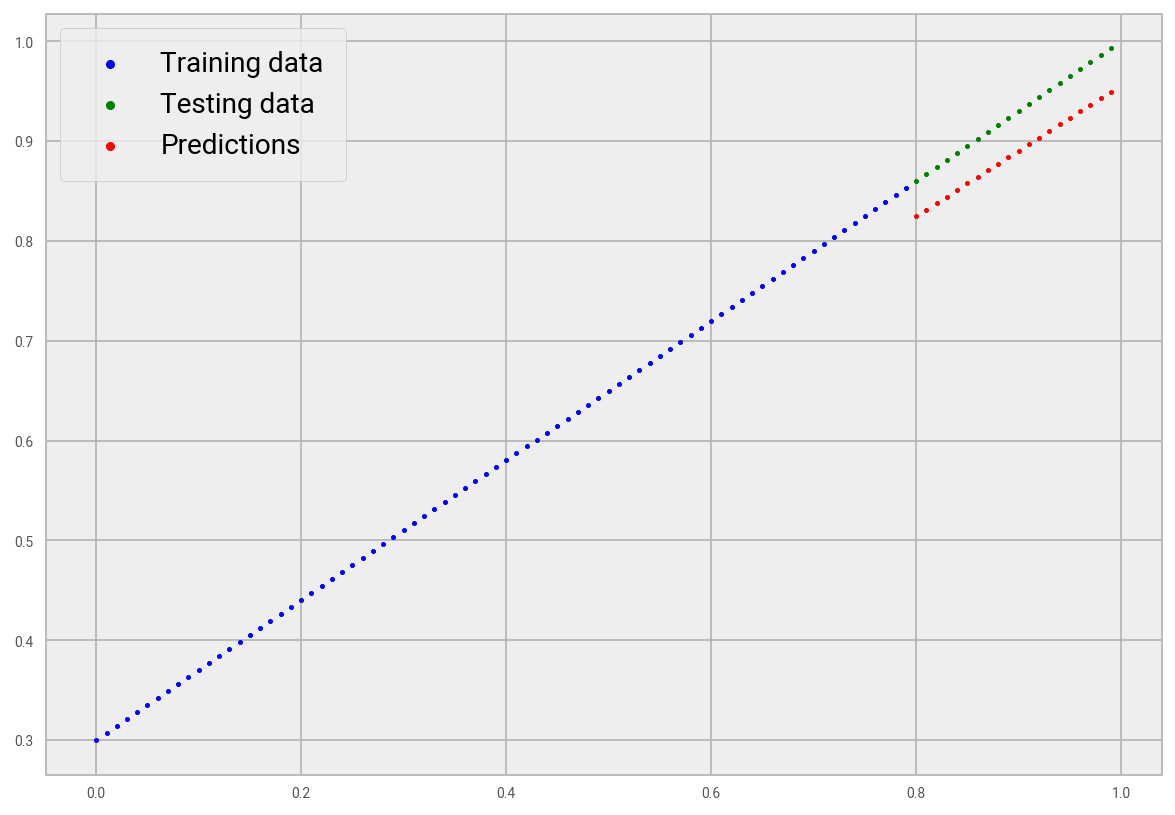

In [49]:
#turn on evaluation mode

model_4.eval()

#make predictions(inference):
with torch.no_grad():
    y_preds_troubleshoot = model_4(x_test_regression)
    
#make plottng predictions

plot_predictions(train_data=x_train_regression, 
                     train_labels=y_train_regression, 
                     test_data=x_test_regression, 
                     test_labels=y_test_regression,
                predictions =y_preds_troubleshoot );
    

# Okay, unlike model_3 on the classification data, it looks like model_4's loss is actually going down.Let's plot its predictions to see if that's so. So we understand from this troubleshooting that, our model at least has some capacity to learn. Ok now lets see why our losses did not reduce with epoch in model_3 by starting it out fresh again

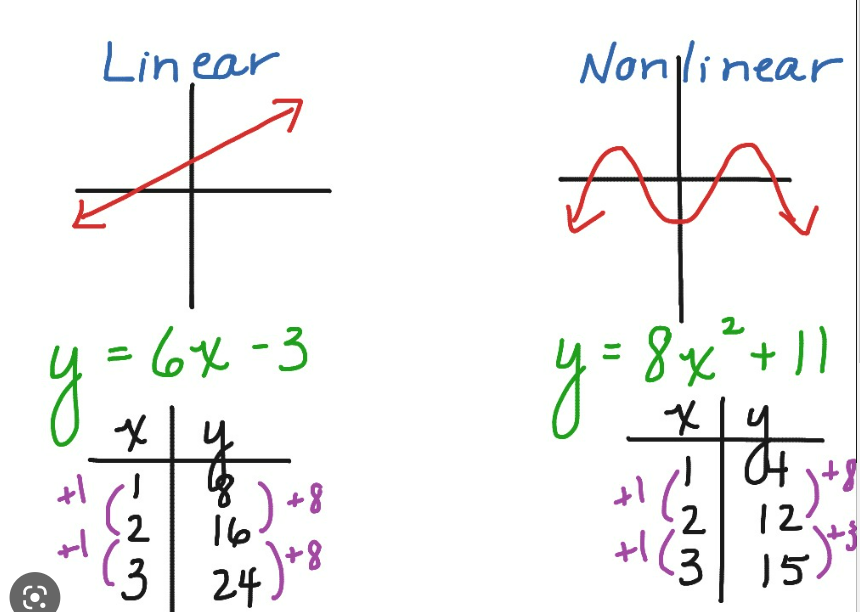

#### Our model did not work before because, our data is a non linear data, but we tried predicted non linear data with linear functions. That is the reason it did not work... So inorder to work, we add non-linear functions to the model.  

### Recreating non-linear data (red and blue dots)

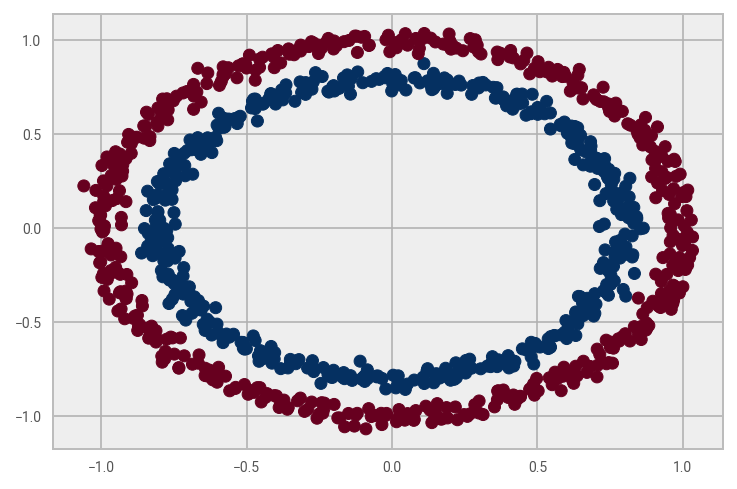

In [50]:

# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);


In [51]:

# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

In [52]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

#### Buiilding Non Linear Data

In [53]:
from torch import nn
class CicleModelV5(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu = nn.ReLU() #relu is a non linear activation function
        
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_5 = CicleModelV5()
print(model_5)     

CicleModelV5(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


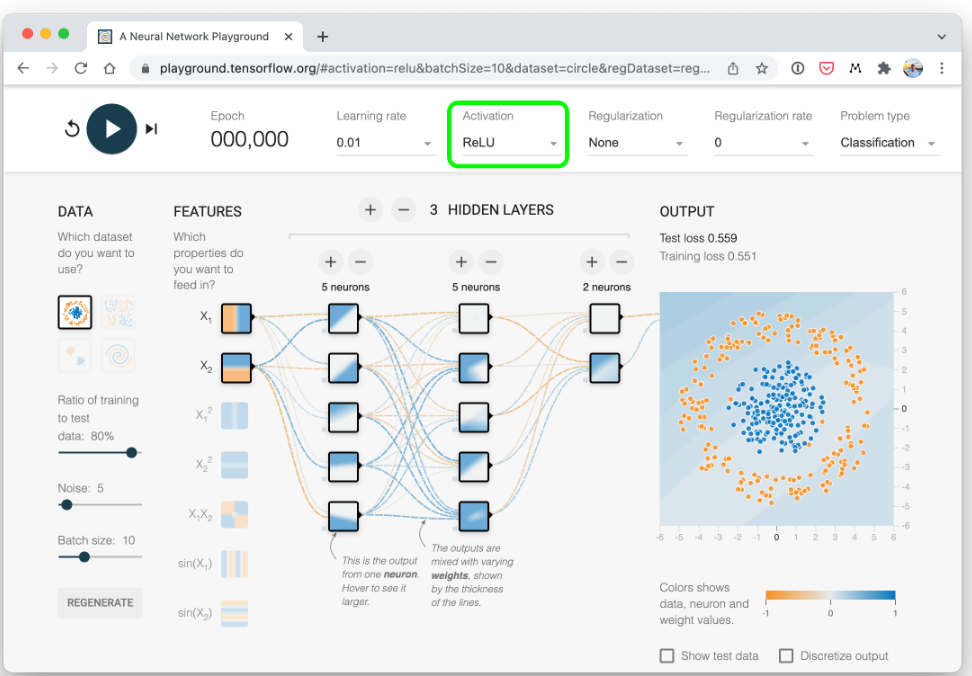

In [54]:
#after creating model, set up loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_5.parameters(), lr = 0.1)

In [55]:
#training model with non-linearity 

torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    
    model_5.train()
    
    #forward pass
    y_logits = model_5(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #calculate the loss
    
    loss = loss_fn(y_logits, y_train)
    
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    
    #optimizer
    
    optimizer.zero_grad()
    
    #loss backward
    loss.backward()
    
    #optimizer step
    optimizer.step()
    
    #testing 
    model_5.eval()
    with torch.no_grad():
        
        #forward pass
        test_logits = model_5(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #calculate the loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        t_accuracy = accuracy_fn(y_true = y_test, 
                                 y_pred = test_pred)
        
    #printing the status
    
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss : {loss:.5f}, Accuracy : {acc:.2f}% | Test loss : {test_loss:.5f}, Test accuracy : {t_accuracy:.2f}%")

Epoch:0 | Loss : 0.69295, Accuracy : 50.00% | Test loss : 0.69319, Test accuracy : 50.00%
Epoch:100 | Loss : 0.69115, Accuracy : 52.88% | Test loss : 0.69102, Test accuracy : 52.50%
Epoch:200 | Loss : 0.68977, Accuracy : 53.37% | Test loss : 0.68940, Test accuracy : 55.00%
Epoch:300 | Loss : 0.68795, Accuracy : 53.00% | Test loss : 0.68723, Test accuracy : 56.00%
Epoch:400 | Loss : 0.68517, Accuracy : 52.75% | Test loss : 0.68411, Test accuracy : 56.50%
Epoch:500 | Loss : 0.68102, Accuracy : 52.75% | Test loss : 0.67941, Test accuracy : 56.50%
Epoch:600 | Loss : 0.67515, Accuracy : 54.50% | Test loss : 0.67285, Test accuracy : 56.00%
Epoch:700 | Loss : 0.66659, Accuracy : 58.38% | Test loss : 0.66322, Test accuracy : 59.00%
Epoch:800 | Loss : 0.65160, Accuracy : 64.00% | Test loss : 0.64757, Test accuracy : 67.50%
Epoch:900 | Loss : 0.62362, Accuracy : 74.00% | Test loss : 0.62145, Test accuracy : 79.00%


##### 6.4 Evaluating a model trained with non-linear activation functions`

In [56]:
#make predictions

model_5.eval()
with torch.no_grad():
    y_preds =  torch.round(torch.sigmoid(model_5(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

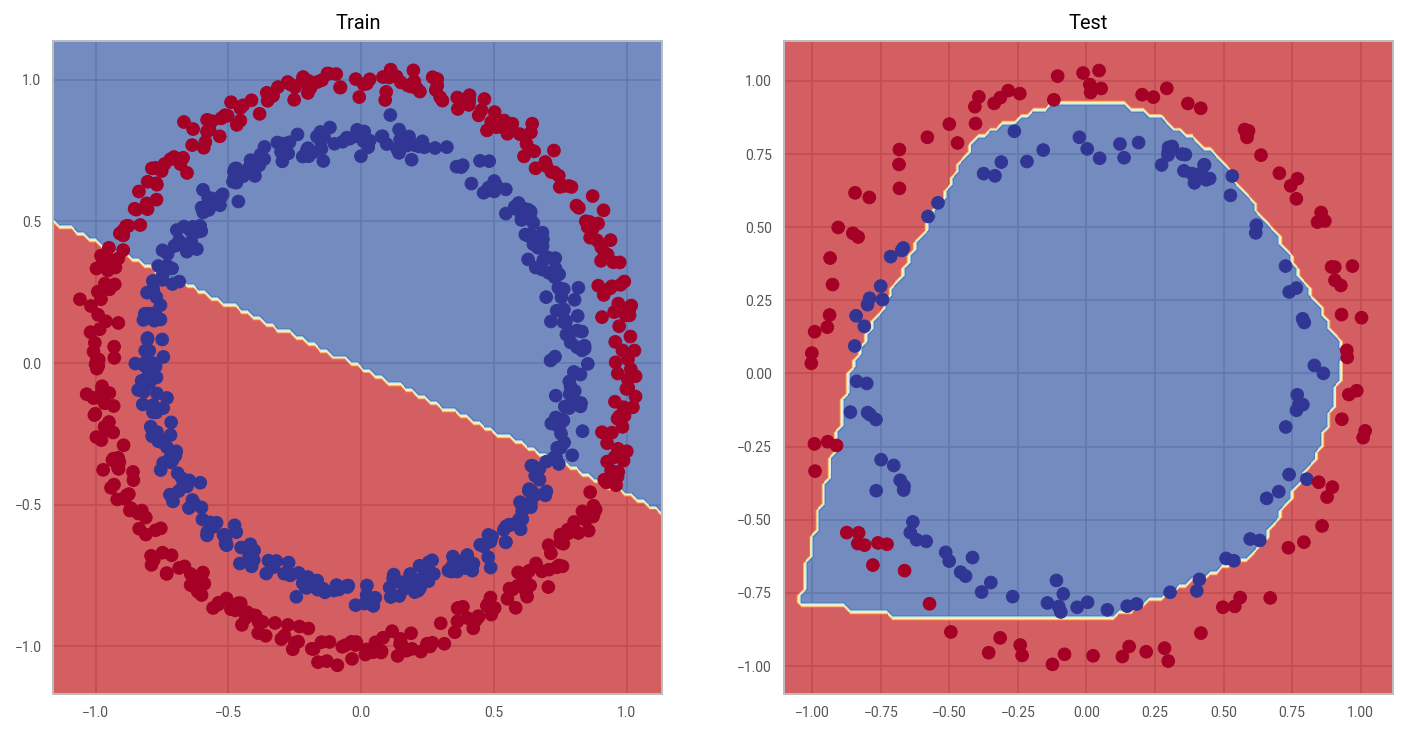

In [57]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, x_train, y_train) # model_3 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test) # model_5 = has non-linearity

# Multiclass classification

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


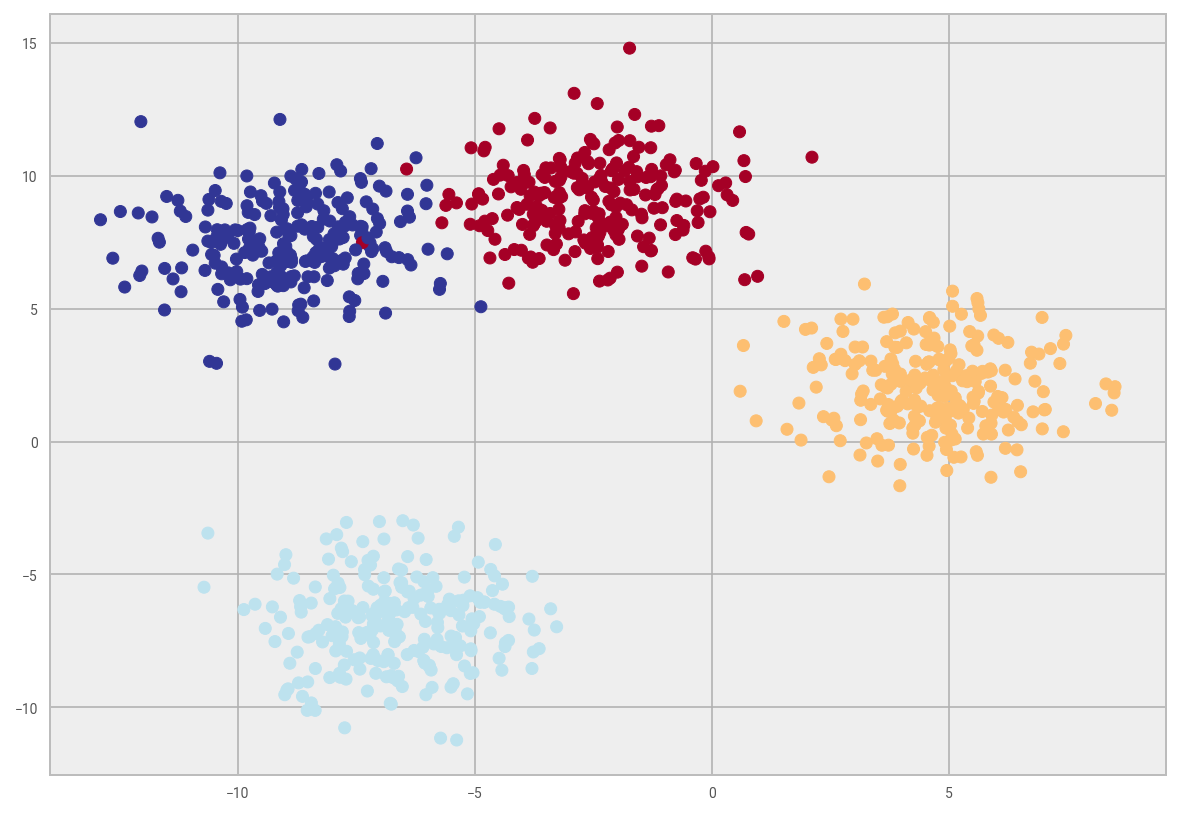

In [58]:
#Import dependencies 

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set hyperparameters 

NUM_CLASSES =4
NUM_FEATURES = 2
RANDOM_SEED = 42


#create multiclass data

x_blob, y_blob = make_blobs( n_samples = 1000,
                           n_features = NUM_FEATURES,
                           centers = NUM_CLASSES,
                           cluster_std = 1.5,
                           random_state = RANDOM_SEED)

#turn data into tensors

X_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

#Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

#Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


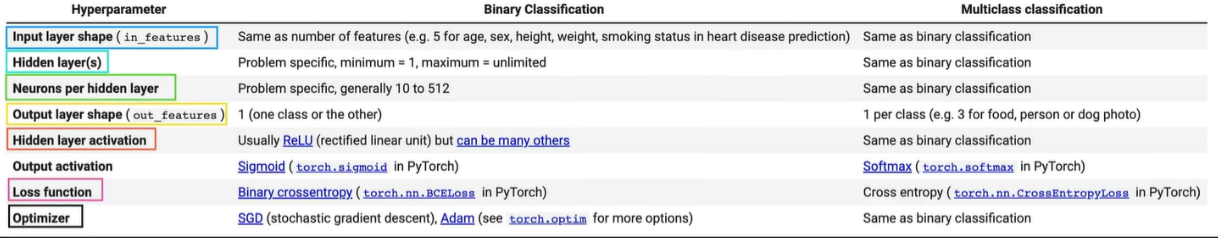

In [59]:
#build a multiclass classification model

class blobmodel(nn.Module):
    def __init__(self,input_features, output_features, hidden_units = 8 ):
        """ Initializes multi-class classification model
        
        Args: 
             input_features (int) : Number of input features to the model
             output_features (int) : Number of output classes
             hidden_units(int) : Number of hidden units between layers default 8
            
        Returns:
            
            """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x) #as we constructed using self.linear_layer_Stack it should go sequential, so we are good with just x



In [60]:
model_6 = blobmodel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8)
model_6

blobmodel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

#### Creating a loss function and optimizer for a multi-class PyTorch model

In [61]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_6.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance


In [62]:
#lets get raw output of the model(logits)

model_6.eval()
with torch.no_grad():
    y_logits_blobs = model_6(X_blob_test)
    
y_logits_blobs[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In order to evaluate and train and test our model, we need to convert our models raw output (logits) -> prediction probabilities -> prediction labels.

we have used sigmoid function for this conversion in binary classification. for multiclass we use softmax

The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

In [63]:
y_preds_probs = torch.softmax(y_logits_blobs, dim=1)

print(y_logits_blobs[:5])

print(y_preds_probs[:5])

#we can see y_preds_blobs

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [64]:
y_preds_probs[0]

tensor([0.1872, 0.2918, 0.1495, 0.3715])

In [65]:
#lets take the above tensor, so these 4 values indictae 4 output classes. The model preidcting that, the test value x is 0.1872 prob of being 1st clss, 0.2918 prob of being 2nd class

torch.sum(y_preds_probs[0]) #sum of prob of all classes equal to 1

tensor(1.)

In [66]:
#converting model prediction probs to labels

y_preds = torch.argmax(y_preds_probs, dim =1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [67]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

##### We have converted the model output and y_test of same shape and format

#### Creating a training and testing loop for a multi-class PyTorch model

In [68]:

# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

for epoch in range(epochs):
    ### Training
    model_6.train()

    # 1. Forward pass
    y_logits = model_6(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
   
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_6.eval()
    with torch.no_grad():
      # 1. Forward pass
      test_logits = model_6(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")    

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


In [69]:

# Make predictions
model_6.eval()
with torch.no_grad():
    y_logits = model_6(X_blob_test)

# View the first 10 predictions
y_logits[:10]


tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

Alright, looks like our model's predictions are still in logit form.they'll have to be in the same form as our labels (y_blob_test) which are in integer form.Let's convert our model's prediction logits to prediction probabilities (using torch.softmax()) then to prediction labels (by taking the argmax() of each sample).

In [70]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")


Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


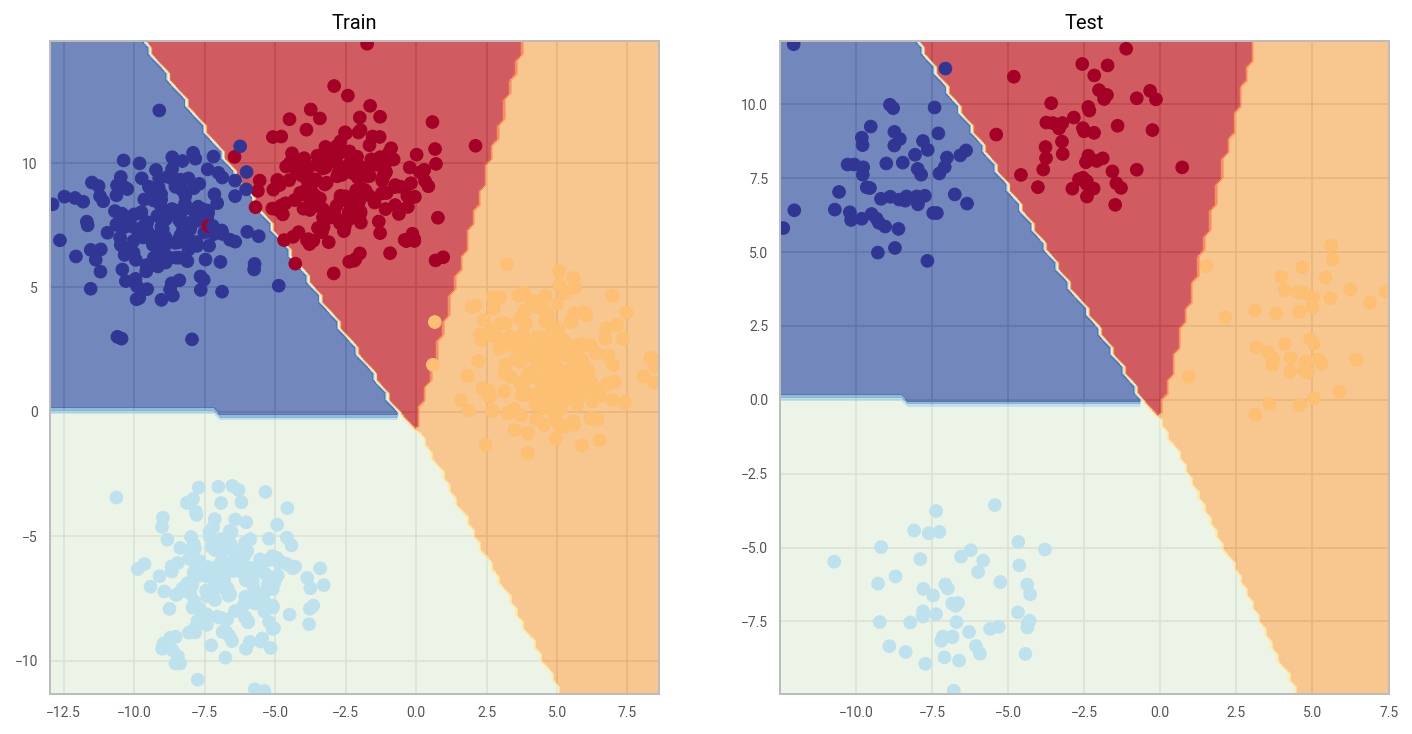

In [71]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X_blob_test, y_blob_test)



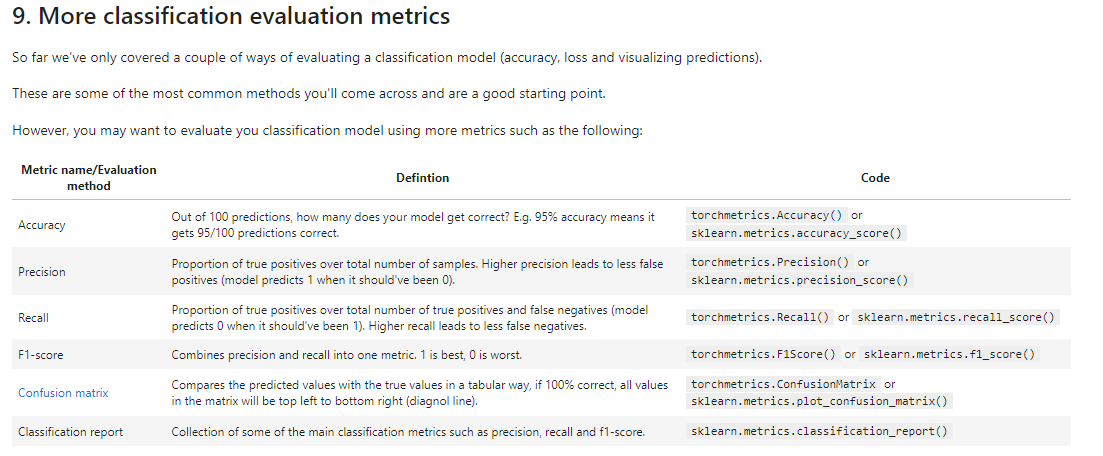

Let's try the torchmetrics.Accuracy metric out.

In [72]:
#!pip3 install torchmetrics

from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

TypeError: __init__() got an unexpected keyword argument 'task'